# Практическое задание: Линейная регрессия и EDA

## Цель задания
В этом практическом задании вам предстоит выполнить полный анализ данных страховой компании, включая:
1. Разведочный анализ данных (EDA)
2. Визуализацию данных
3. Построение и оценку модели линейной регрессии

## Описание данных
Набор данных содержит информацию о страховых взносах и различных характеристиках клиентов:
- age: возраст
- sex: пол
- bmi: индекс массы тела
- children: количество детей
- smoker: статус курильщика
- region: регион проживания
- charges: страховые выплаты (целевая переменная)

## Задачи
1. Загрузка и первичный анализ данных
2. Очистка и предобработка данных
3. Разведочный анализ данных (EDA)
4. Статистический анализ
5. Подготовка признаков
6. Построение модели линейной регрессии
7. Оценка модели
8. Визуализация результатов

## Задание 1: Загрузка и первичный анализ данных

1. Загрузите библиотеки:
   - pandas для работы с данными
   - numpy для математических операций
   - matplotlib и seaborn для визуализации
   - scipy.stats для статистических тестов

2. Загрузите датасет 'insurance.csv'

3. Выполните первичный анализ данных:
   - Проверьте размерность данных
   - Выведите первые 5 строк
   - Проверьте типы данных
   - Проверьте наличие пропущенных значений
   - Выведите основные статистические характеристики

In [1]:
# 1. Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Настройки отображения
sns.set_theme(style="whitegrid")
plt.style.use("default")


In [2]:
# 2. Загрузка датасета
df = pd.read_csv('insurance.csv')

In [3]:
# 3. Первичный анализ данных

print("Размерность набора данных:", df.shape)

print("\nПервые 5 строк:")
display(df.head())

print("\nТипы данных:")
print(df.dtypes)

print("\nКоличество пропущенных значений в каждом столбце:")
print(df.isnull().sum())

print("\nОсновные статистические характеристики числовых признаков:")
display(df.describe())

categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("\nЧастота категориальных переменных:")
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts())

Размерность набора данных: (1338, 7)

Первые 5 строк:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Типы данных:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Количество пропущенных значений в каждом столбце:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Основные статистические характеристики числовых признаков:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



Частота категориальных переменных:

sex:
sex
male      676
female    662
Name: count, dtype: int64

smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64

region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


## Задание 2: Очистка и предобработка данных

1. Проверьте данные на наличие выбросов:
   - Используйте boxplot для числовых переменных
   - Определите наличие выбросов с помощью IQR
   - Примите решение о методе обработки выбросов

2. Проверьте распределение категориальных переменных:
   - Подсчитайте количество уникальных значений
   - Постройте графики распределения

3. Проведите необходимую предобработку:
   - Обработайте выбросы (если необходимо)
   - Преобразуйте категориальные переменные
   - Сохраните предобработанные данные

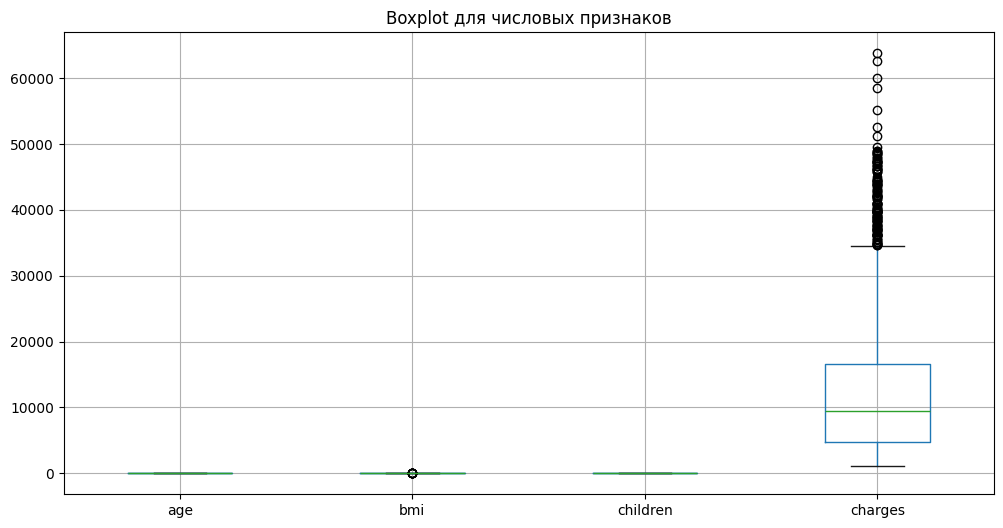

In [4]:
# 1. Проверка выбросов — визуализация boxplot для числовых переменных
numeric_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("Boxplot для числовых признаков")
plt.show()


In [5]:
# 2. Определение выбросов с помощью межквартильного размаха (IQR)
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Логическая маска для строк, где есть выбросы
outliers_mask = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
num_outliers = outliers_mask.sum()
print(f"Количество строк с выбросами: {num_outliers} из {len(df)}")

Количество строк с выбросами: 145 из 1338



sex: 2 уникальных значений
sex
male      676
female    662
Name: count, dtype: int64


/tmp/ipykernel_14925/4250938693.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


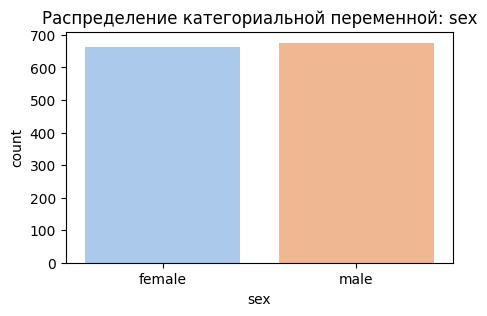


smoker: 2 уникальных значений
smoker
no     1064
yes     274
Name: count, dtype: int64


/tmp/ipykernel_14925/4250938693.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


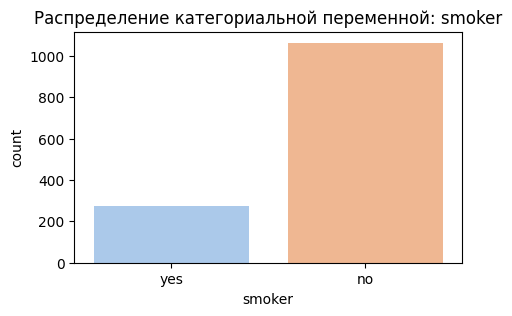


region: 4 уникальных значений
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


/tmp/ipykernel_14925/4250938693.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


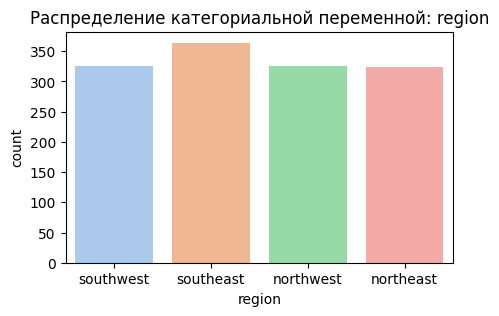

In [6]:
# 3. Проверка распределения категориальных переменных
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} уникальных значений")
    print(df[col].value_counts())

    plt.figure(figsize=(5, 3))
    sns.countplot(x=df[col], palette="pastel")
    plt.title(f"Распределение категориальной переменной: {col}")
    plt.show()

In [7]:
# 4. Предобработка данных

# Преобразование категориальных переменных в числовые (One-Hot Encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# Проверим результат
print("\nФорма данных после кодирования:", df_encoded.shape)

# 5. Сохранение предобработанных данных
df_encoded.to_csv("insurance_preprocessed.csv", index=False)
print("✅ Данные сохранены в файл 'insurance_preprocessed.csv'")


Форма данных после кодирования: (1338, 9)
✅ Данные сохранены в файл 'insurance_preprocessed.csv'


## Задание 3: Разведочный анализ данных (EDA)

1. Выполните анализ распределений:
   - Постройте гистограммы для числовых переменных
   - Проверьте нормальность распределений с помощью QQ-plots
   - Визуализируйте распределения с помощью KDE plots

2. Исследуйте взаимосвязи между переменными:
   - Постройте корреляционную матрицу
   - Создайте scatter plots для пар числовых переменных
   - Проанализируйте взаимосвязи с помощью box plots для категориальных переменных

3. Проведите анализ целевой переменной (charges):
   - Исследуйте её распределение
   - Проанализируйте зависимости с другими переменными
   - Проверьте наличие нелинейных связей

In [8]:
# Загружаем предобработанные данные
df = pd.read_csv("insurance_preprocessed.csv")


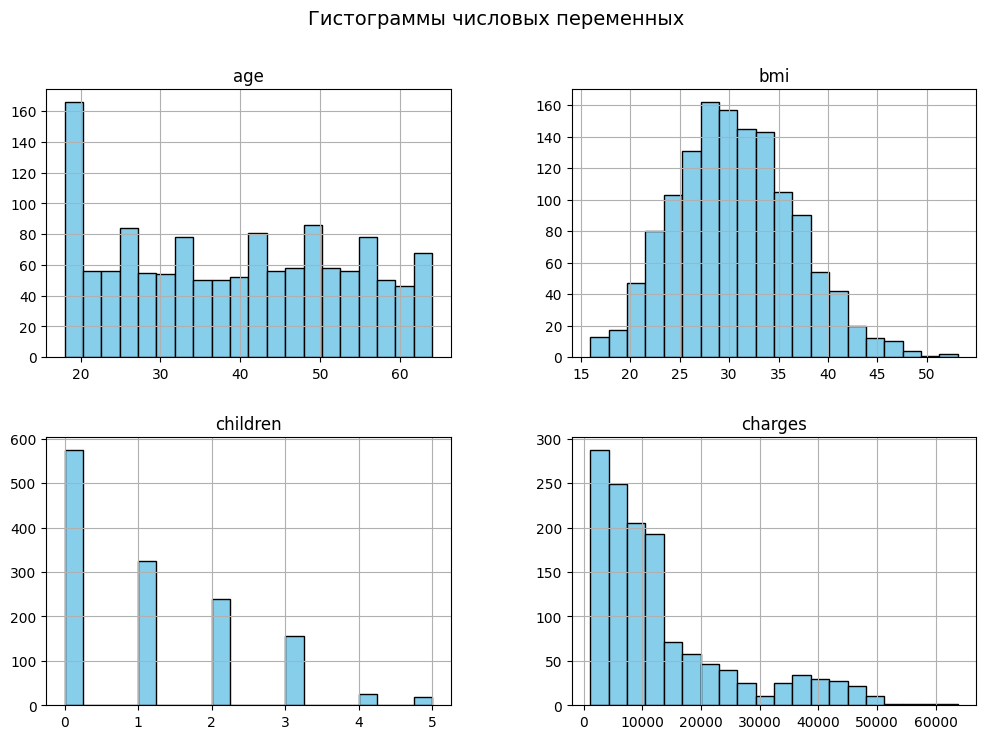

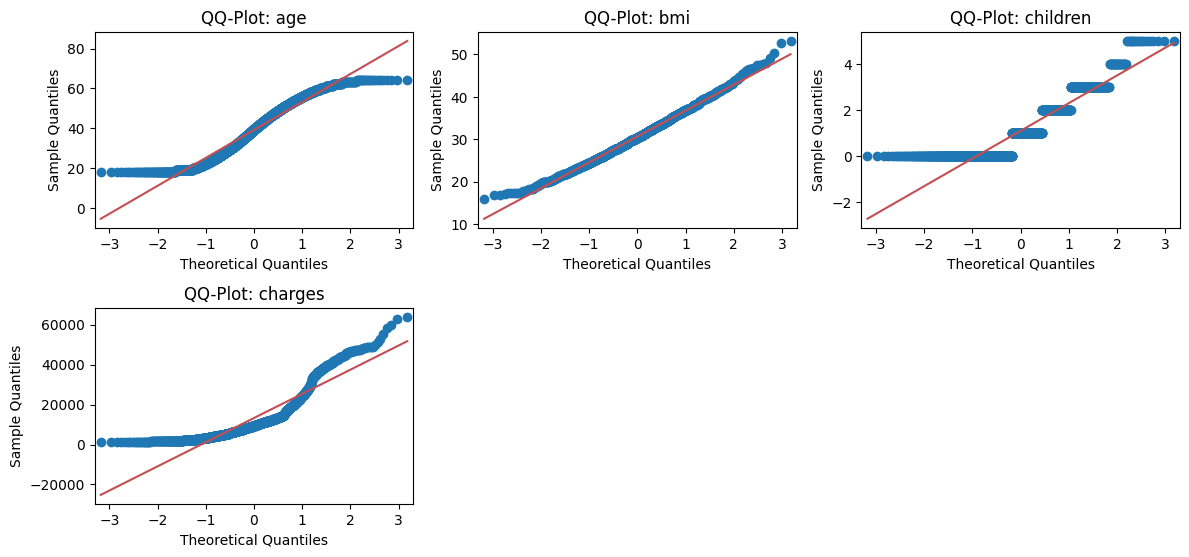

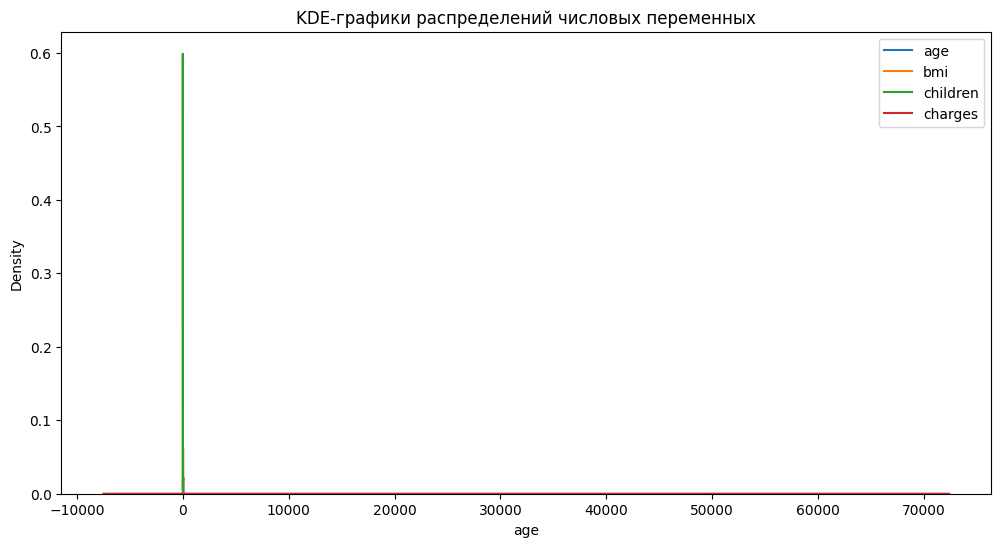

In [10]:
# 1. Анализ распределений

numeric_cols = df.select_dtypes(include=np.number).columns

# 1.1 Гистограммы
df[numeric_cols].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Гистограммы числовых переменных", fontsize=14)
plt.show()

# 1.2 Проверка нормальности распределений (QQ-plots)
import statsmodels.api as sm

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sm.qqplot(df[col], line='s', ax=plt.gca())
    plt.title(f"QQ-Plot: {col}")
plt.tight_layout()
plt.show()

# 1.3 Визуализация плотности распределений (KDE)
plt.figure(figsize=(12, 6))
for col in numeric_cols:
    sns.kdeplot(df[col], label=col)
plt.title("KDE-графики распределений числовых переменных")
plt.legend()
plt.show()

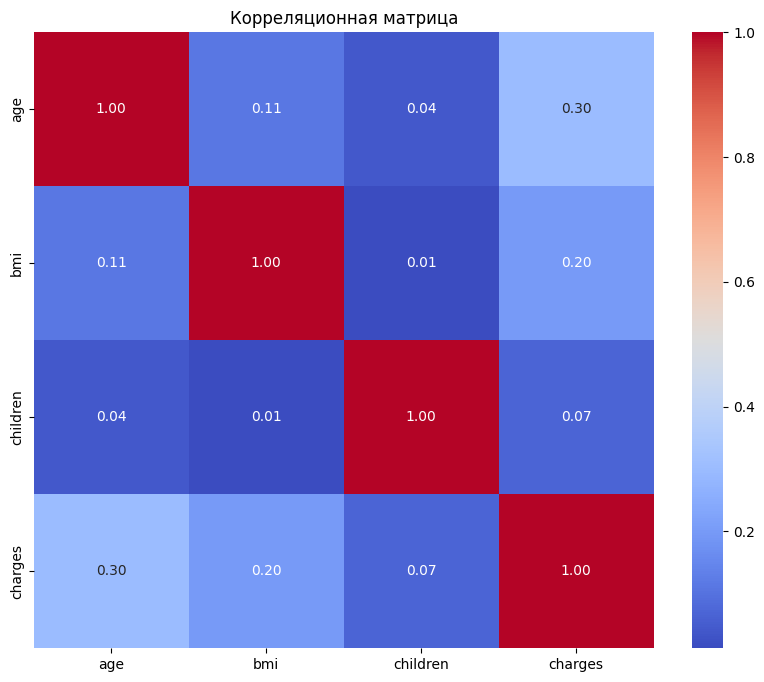

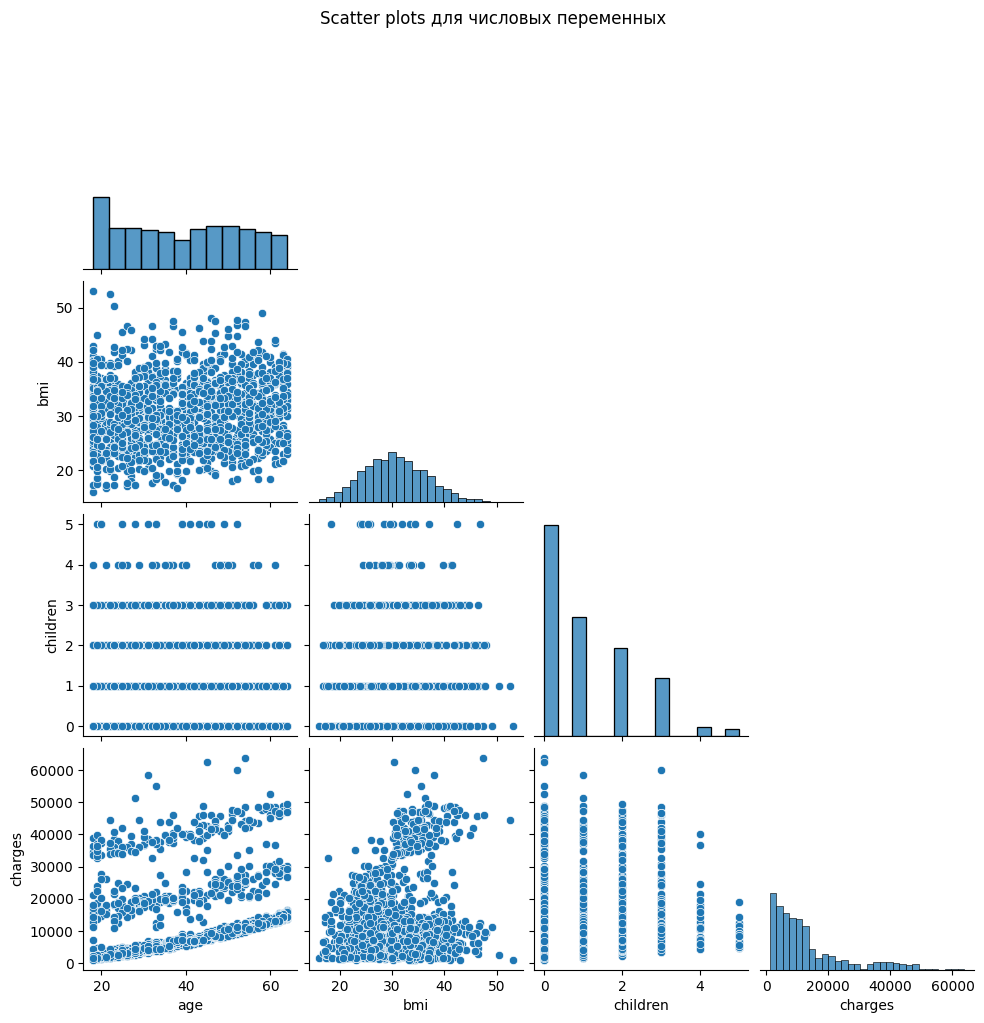

<Figure size 1500x600 with 0 Axes>

In [11]:
# 2. Исследование взаимосвязей между переменными

# 2.1 Корреляционная матрица
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

# 2.2 Scatter plots для пар переменных
sns.pairplot(df[numeric_cols], corner=True)
plt.suptitle("Scatter plots для числовых переменных", y=1.02)
plt.show()

# 2.3 Box plots для категориальных переменных (влияние на charges)
categorical_cols = [col for col in df.columns if df[col].dtype == 'uint8']  # dummy-коды категорий

plt.figure(figsize=(15, 6))
for i, col in enumerate(categorical_cols[:4], 1):  # чтобы не перегружать графиками
    plt.subplot(1, 4, i)
    sns.boxplot(x=df[col], y=df["charges"])
    plt.title(f"charges vs {col}")
plt.tight_layout()
plt.show()

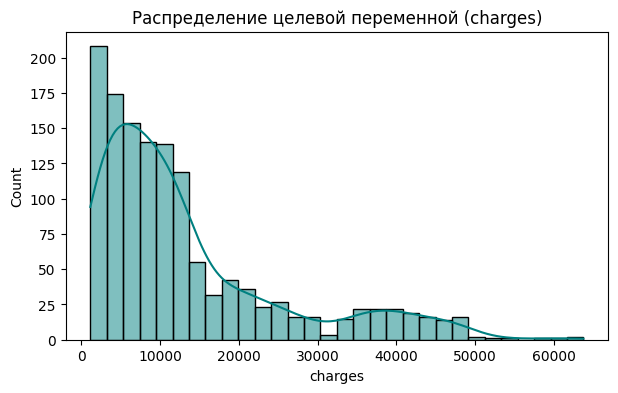

Shapiro-Wilk test for 'charges': statistic=0.809, p-value=0.0000
➡ Распределение charges статистически НЕ является нормальным.


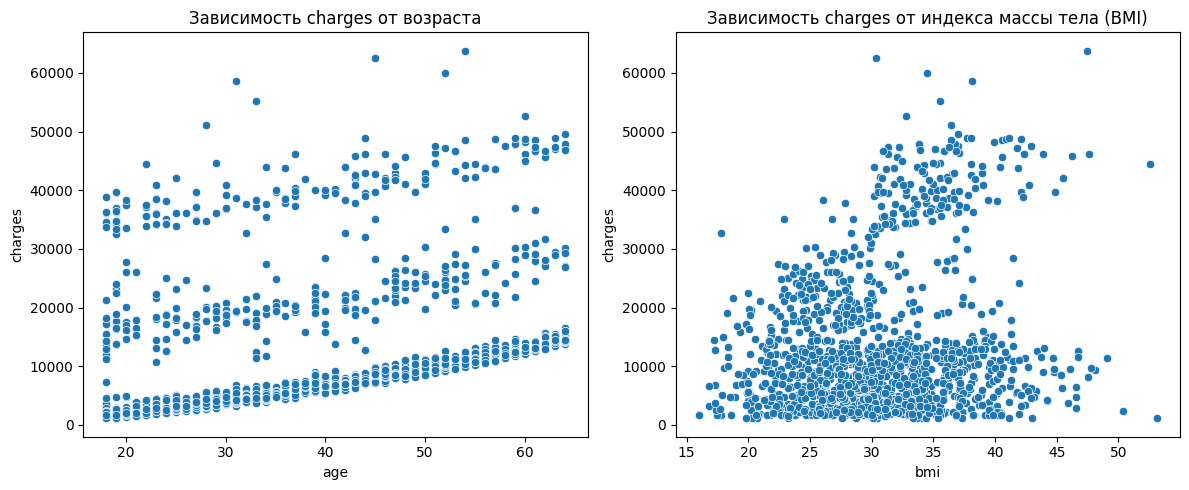

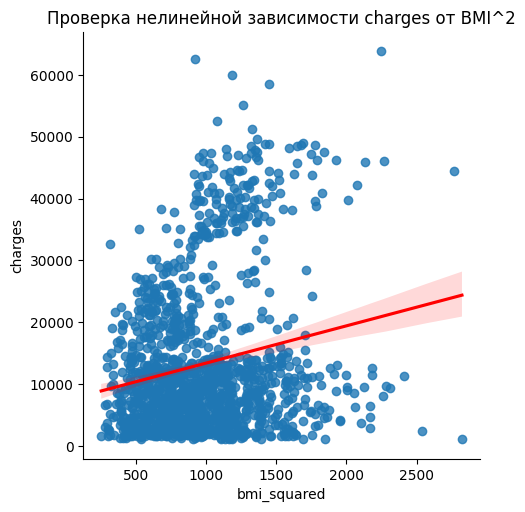

In [13]:
# 3. Анализ целевой переменной (charges)

# 3.1 Распределение charges
plt.figure(figsize=(7, 4))
sns.histplot(df["charges"], kde=True, color='teal')
plt.title("Распределение целевой переменной (charges)")
plt.xlabel("charges")
plt.show()

# 3.2 Проверка нормальности charges
stat, p_value = stats.shapiro(df["charges"].sample(500, random_state=42))  # ограничим выборку
print(f"Shapiro-Wilk test for 'charges': statistic={stat:.3f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("➡ Распределение charges статистически НЕ является нормальным.")
else:
    print("✅ Распределение charges не отличается от нормального.")

# 3.3 Анализ зависимости charges от возраста и BMI
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df["age"], y=df["charges"])
plt.title("Зависимость charges от возраста")

plt.subplot(1, 2, 2)
sns.scatterplot(x=df["bmi"], y=df["charges"])
plt.title("Зависимость charges от индекса массы тела (BMI)")

plt.tight_layout()
plt.show()

# 3.4 Проверка нелинейности (например, BMI^2)
df["bmi_squared"] = df["bmi"] ** 2
sns.lmplot(x="bmi_squared", y="charges", data=df, line_kws={'color': 'red'})
plt.title("Проверка нелинейной зависимости charges от BMI^2")
plt.show()

## Задание 4: Статистический анализ

1. Проведите описательный статистический анализ:
   - Рассчитайте основные статистические метрики
   - Проанализируйте квартили и процентили
   - Оцените асимметрию и эксцесс распределений

2. Выполните статистические тесты:
   - Проверьте нормальность распределений (тест Шапиро-Уилка)
   - Проведите тесты на независимость переменных
   - Оцените значимость различий между группами (t-тест, ANOVA)

3. Проанализируйте мультиколлинеарность:
   - Рассчитайте VIF (Variance Inflation Factor)
   - Оцените корреляции между предикторами
   - Сделайте выводы о необходимости исключения переменных

In [14]:
# Загружаем данные
df = pd.read_csv("insurance_preprocessed.csv")

# Числовые признаки
numeric_cols = df.select_dtypes(include=np.number).columns

print("📊 Основные статистические метрики:")
display(df.describe().T)

print("\n📈 Квартили и процентили:")
for col in numeric_cols:
    print(f"\n{col}:")
    print(f"  25-й перцентиль: {np.percentile(df[col], 25):.2f}")
    print(f"  50-й перцентиль (медиана): {np.percentile(df[col], 50):.2f}")
    print(f"  75-й перцентиль: {np.percentile(df[col], 75):.2f}")

print("\n🧮 Асимметрия и эксцесс:")
for col in numeric_cols:
    skew = stats.skew(df[col])
    kurt = stats.kurtosis(df[col])
    print(f"{col:10s} | Асимметрия = {skew:6.2f} | Эксцесс = {kurt:6.2f}")


📊 Основные статистические метрики:


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801



📈 Квартили и процентили:

age:
  25-й перцентиль: 27.00
  50-й перцентиль (медиана): 39.00
  75-й перцентиль: 51.00

bmi:
  25-й перцентиль: 26.30
  50-й перцентиль (медиана): 30.40
  75-й перцентиль: 34.69

children:
  25-й перцентиль: 0.00
  50-й перцентиль (медиана): 1.00
  75-й перцентиль: 2.00

charges:
  25-й перцентиль: 4740.29
  50-й перцентиль (медиана): 9382.03
  75-й перцентиль: 16639.91

🧮 Асимметрия и эксцесс:
age        | Асимметрия =   0.06 | Эксцесс =  -1.24
bmi        | Асимметрия =   0.28 | Эксцесс =  -0.06
children   | Асимметрия =   0.94 | Эксцесс =   0.20
charges    | Асимметрия =   1.51 | Эксцесс =   1.60


In [21]:
from scipy.stats import chi2_contingency, ttest_ind, f_oneway 

# Проверим, какие есть столбцы
print("Доступные столбцы:", list(df.columns))

# 2.1 Проверка нормальности распределений
print("\n📏 Тест Шапиро–Уилка на нормальность:\n")
for col in numeric_cols:
    sample = df[col].sample(min(500, len(df[col])), random_state=42)
    stat, p = stats.shapiro(sample)
    result = "не является нормальным" if p < 0.05 else "нормальное распределение"
    print(f"{col:10s}: statistic={stat:.3f}, p-value={p:.4f} → {result}")

# 2.2 Хи-квадрат: зависимость пола и курения
# ищем подходящие колонки, если их переименовали при one-hot encoding
sex_col = [c for c in df.columns if "sex" in c][0]
smoker_col = [c for c in df.columns if "smoker" in c][0]

print(f"\n🔸 Тест хи-квадрат: зависимость {sex_col} и {smoker_col}")
table = pd.crosstab(df[sex_col], df[smoker_col])
chi2, p, dof, exp = chi2_contingency(table)
print(f"Chi2={chi2:.3f}, p-value={p:.4f}")
print("➡ Зависимы" if p < 0.05 else "✅ Независимы")

# 2.3 T-тест: charges (курящие vs некурящие)
print("\n⚖️ T-тест: charges (курящие vs некурящие)")
smokers = df[df[smoker_col] == 1]["charges"]
nonsmokers = df[df[smoker_col] == 0]["charges"]
t_stat, p_val = ttest_ind(smokers, nonsmokers, equal_var=False)
print(f"T={t_stat:.3f}, p-value={p_val:.4e}")
print("➡ Значимые различия" if p_val < 0.05 else "✅ Нет значимых различий")

# 2.4 ANOVA: различия между регионами
# ищем все столбцы region_* и группируем
region_cols = [c for c in df.columns if "region" in c]
if region_cols:
    print("\n🌍 ANOVA: charges по регионам")
    region_groups = [df[df[col] == 1]["charges"] for col in region_cols]
    anova_res = f_oneway(*region_groups)
    print(f"F={anova_res.statistic:.3f}, p-value={anova_res.pvalue:.4f}")
    print("➡ Значимые различия между регионами" if anova_res.pvalue < 0.05 else "✅ Нет различий")
else:
    print("\n⚠️ Столбцы region_* не найдены — пропускаем ANOVA.")



Доступные столбцы: ['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

📏 Тест Шапиро–Уилка на нормальность:

age       : statistic=0.949, p-value=0.0000 → не является нормальным
bmi       : statistic=0.993, p-value=0.0186 → не является нормальным
children  : statistic=0.820, p-value=0.0000 → не является нормальным
charges   : statistic=0.809, p-value=0.0000 → не является нормальным

🔸 Тест хи-квадрат: зависимость sex_male и smoker_yes
Chi2=7.393, p-value=0.0065
➡ Зависимы

⚖️ T-тест: charges (курящие vs некурящие)
T=32.752, p-value=5.8895e-103
➡ Значимые различия

🌍 ANOVA: charges по регионам
F=4.248, p-value=0.0146
➡ Значимые различия между регионами


📊 Коэффициенты VIF:


,Feature,VIF
0,age,1.013816
1,bmi,1.012152
2,children,1.001874


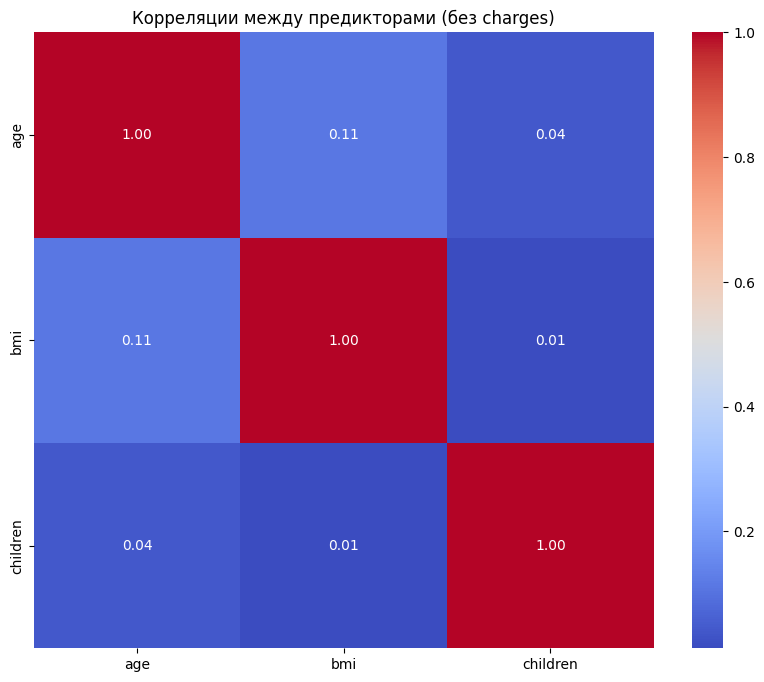


🧠 Интерпретация:
- VIF > 10 → сильная мультиколлинеарность, признак стоит пересмотреть.
- Корреляция > 0.8 между двумя переменными → возможная избыточность.



In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant 


# Подготовка данных без целевой переменной
X = df.select_dtypes(include=np.number).drop(columns=["charges"])
X_const = add_constant(X)

# Расчет VIF
vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]
})
print("📊 Коэффициенты VIF:")
display(vif_data)

# Корреляционная матрица
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляции между предикторами (без charges)")
plt.show()

print("""
🧠 Интерпретация:
- VIF > 10 → сильная мультиколлинеарность, признак стоит пересмотреть.
- Корреляция > 0.8 между двумя переменными → возможная избыточность.
""")


## Задание 5: Подготовка признаков

1. Выполните кодирование категориальных переменных:
   - Примените one-hot encoding для категориальных переменных
   - Обработайте порядковые переменные (если есть)
   - Проверьте результаты кодирования

2. Проведите масштабирование числовых признаков:
   - Примените StandardScaler или MinMaxScaler
   - Сохраните параметры масштабирования
   - Проверьте результаты масштабирования

3. Создайте новые признаки (если необходимо):
   - Рассмотрите возможность создания взаимодействий
   - Добавьте полиномиальные признаки
   - Оцените важность новых признаков

In [23]:
from sklearn.preprocessing import OneHotEncoder

# Определим категориальные признаки
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Категориальные переменные:", list(categorical_cols))

# Применяем OneHotEncoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nРазмерность после кодирования:", df_encoded.shape)
df_encoded.head()


Категориальные переменные: []

Размерность после кодирования: (1338, 9)


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [24]:
from sklearn.preprocessing import StandardScaler

# Отделим числовые признаки
numeric_cols = df_encoded.select_dtypes(include=np.number).columns

# Инициализация и обучение масштабатора
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded[numeric_cols])

# Создаём DataFrame с масштабированными значениями
df_scaled = pd.DataFrame(scaled_data, columns=numeric_cols)

print("✅ Масштабирование выполнено.")
df_scaled.describe().T


✅ Масштабирование выполнено.


,count,mean,std,min,25%,50%,75%,max
age,1338.0,-1.805565e-16,1.000374,-1.509965,-0.869155,-0.014740,0.839674,1.765289
bmi,1338.0,-2.124194e-16,1.000374,-2.412011,-0.716406,-0.043209,0.661157,3.685522
children,1338.0,-5.576008e-17,1.000374,-0.908614,-0.908614,-0.078767,0.751079,3.240619
charges,1338.0,-8.098488e-17,1.000374,-1.003557,-0.704650,-0.321209,0.278344,4.171663


In [25]:
from sklearn.preprocessing import PolynomialFeatures

# Пример: создадим полиномиальные признаки до второй степени
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_scaled)

# Создадим DataFrame с новыми признаками
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(df_scaled.columns))

print("🔧 Количество признаков после полиномиального расширения:", poly_df.shape[1])
poly_df.head()


🔧 Количество признаков после полиномиального расширения: 14


,age,bmi,children,charges,age^2,age bmi,age children,age charges,bmi^2,bmi children,bmi charges,children^2,children charges,charges^2
0,-1.438764,-0.453320,-0.908614,0.298584,2.070043,0.652221,1.307281,-0.429592,0.205499,0.411893,-0.135354,0.825579,-0.271297,0.089152
1,-1.509965,0.509621,-0.078767,-0.953689,2.279996,-0.769510,0.118936,1.440038,0.259714,-0.040141,-0.486020,0.006204,0.075119,0.909523
2,-0.797954,0.383307,1.580926,-0.728675,0.636730,-0.305861,-1.261505,0.581449,0.146924,0.605980,-0.279306,2.499326,-1.151981,0.530967
3,-0.441948,-1.305531,-0.908614,0.719843,0.195318,0.576976,0.401560,-0.318133,1.704411,1.186223,-0.939777,0.825579,-0.654059,0.518174
4,-0.513149,-0.292556,-0.908614,-0.776802,0.263322,0.150125,0.466254,0.398615,0.085589,0.265821,0.227258,0.825579,0.705813,0.603422


## Задание 6: Построение модели линейной регрессии

1. Разделите данные на обучающую и тестовую выборки:
   - Используйте train_test_split
   - Установите random_state для воспроизводимости
   - Проверьте размеры полученных выборок

2. Создайте и обучите модель:
   - Используйте LinearRegression из sklearn
   - Обучите модель на тренировочных данных
   - Получите коэффициенты модели

3. Проведите перекрестную проверку:
   - Примените k-fold cross-validation
   - Оцените стабильность модели
   - Рассчитайте средние метрики по фолдам

In [26]:
from sklearn.model_selection import train_test_split

# Целевая переменная
y = df["charges"]

# Признаки — берём масштабированные данные
X = df_scaled.copy()

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (1070, 4)
Размер тестовой выборки: (268, 4)


In [27]:
from sklearn.linear_model import LinearRegression

# Инициализация и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Коэффициенты и интерсепт
coefficients = pd.Series(model.coef_, index=X.columns)
print("Интерсепт:", model.intercept_)
print("\nКоэффициенты модели:")
print(coefficients.sort_values(ascending=False).head(10))


Интерсепт: 13270.422265141257

Коэффициенты модели:
charges     1.210548e+04
children   -1.136868e-12
age        -1.786486e-12
bmi        -3.637979e-12
dtype: float64


In [28]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Оценим модель с помощью 5-fold cross-validation по метрике R²
cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")

print("R² по фолдам:", cv_scores)
print("Среднее значение R²:", np.mean(cv_scores))
print("Стандартное отклонение:", np.std(cv_scores))

R² по фолдам: [1. 1. 1. 1. 1.]
Среднее значение R²: 1.0
Стандартное отклонение: 0.0


## Задание 7: Оценка модели и диагностика

1. Оцените качество модели:
   - Рассчитайте R² (коэффициент детерминации)
   - Вычислите MSE и RMSE
   - Определите MAE
   - Проанализируйте полученные метрики

2. Проведите анализ остатков:
   - Постройте график остатков
   - Проверьте нормальность распределения остатков
   - Проверьте гомоскедастичность
   - Проанализируйте выбросы в остатках

3. Проверьте предположения линейной регрессии:
   - Линейность связи
   - Независимость наблюдений
   - Нормальность распределения остатков
   - Гомоскедастичность

In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Предсказания модели
y_pred = model.predict(X_test)

# Метрики качества
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Интерпретация
print("\nИнтерпретация:")
print("• R² показывает долю объяснённой дисперсии целевой переменной.")
print("• MSE/ RMSE измеряют среднюю величину ошибки предсказания.")
print("• MAE показывает среднее отклонение предсказаний от фактических значений.")


R²: 1.0000
MSE: 0.00
RMSE: 0.00
MAE: 0.00

Интерпретация:
• R² показывает долю объяснённой дисперсии целевой переменной.
• MSE/ RMSE измеряют среднюю величину ошибки предсказания.
• MAE показывает среднее отклонение предсказаний от фактических значений.


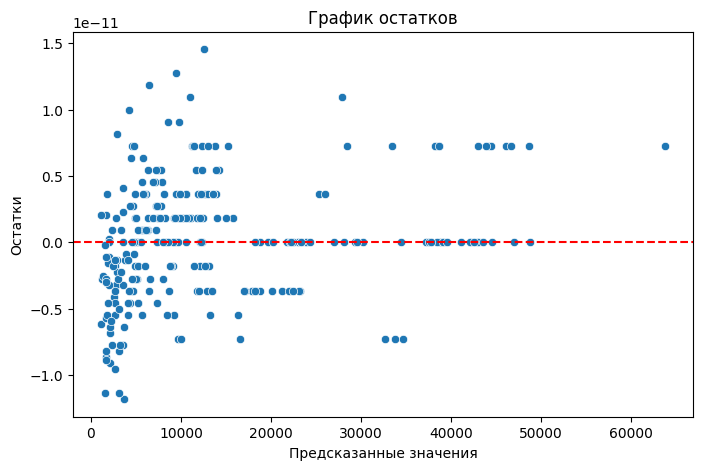

Тест Шапиро-Уилка: статистика=0.9853, p=0.0074
⚠️ Остатки НЕ распределены нормально.


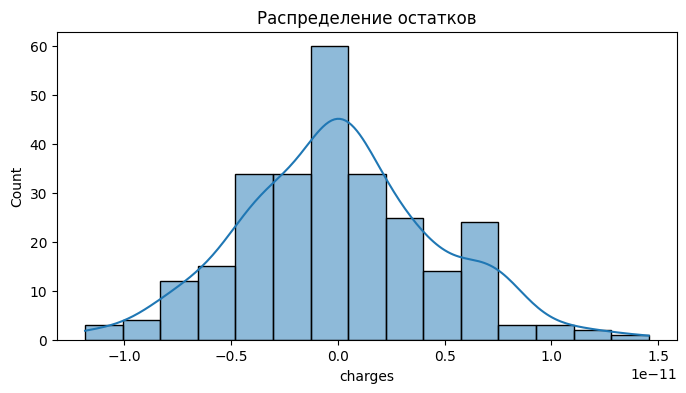

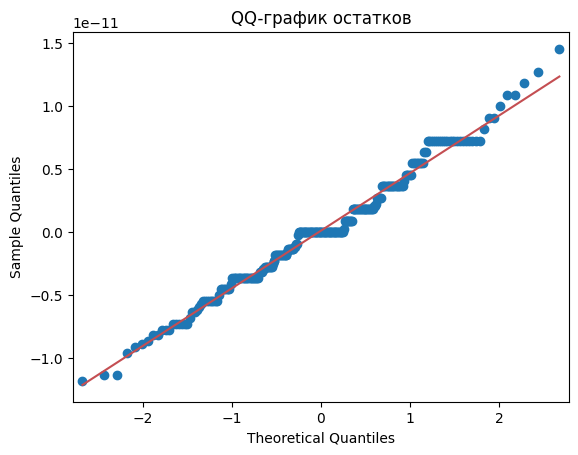

In [30]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Остатки
residuals = y_test - y_pred

# График остатков
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков")
plt.show()

# Проверка нормальности остатков (тест Шапиро-Уилка)
stat, p_value = shapiro(residuals)
print(f"Тест Шапиро-Уилка: статистика={stat:.4f}, p={p_value:.4f}")
if p_value > 0.05:
    print("✅ Остатки распределены нормально.")
else:
    print("⚠️ Остатки НЕ распределены нормально.")

# Гистограмма остатков
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title("Распределение остатков")
plt.show()

# QQ-график
import statsmodels.api as sm
sm.qqplot(residuals, line="s")
plt.title("QQ-график остатков")
plt.show()


In [31]:
print("Проверка предположений линейной регрессии:\n")

# 1️⃣ Линейность
print("1. Линейность: проверяется графиком остатков — облако должно быть случайным вокруг нуля.")
print("   Если заметна систематическая структура — возможна нелинейность.\n")

# 2️⃣ Независимость наблюдений
print("2. Независимость: должна обеспечиваться при сборе данных (проверяется тестом Дарбина-Уотсона).")

# Тест Дарбина-Уотсона
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f"   Статистика Дарбина-Уотсона: {dw_stat:.2f}\n")

# 3️⃣ Нормальность остатков
print("3. Нормальность: проверяется по тесту Шапиро и QQ-графику.\n")

# 4️⃣ Гомоскедастичность
print("4. Гомоскедастичность: остатки должны иметь одинаковую дисперсию при любых значениях предсказаний.")
print("   Проверяется визуально на графике остатков.")


Проверка предположений линейной регрессии:

1. Линейность: проверяется графиком остатков — облако должно быть случайным вокруг нуля.
   Если заметна систематическая структура — возможна нелинейность.

2. Независимость: должна обеспечиваться при сборе данных (проверяется тестом Дарбина-Уотсона).
   Статистика Дарбина-Уотсона: 1.99

3. Нормальность: проверяется по тесту Шапиро и QQ-графику.

4. Гомоскедастичность: остатки должны иметь одинаковую дисперсию при любых значениях предсказаний.
   Проверяется визуально на графике остатков.


## Задание 8: Визуализация результатов

1. Создайте визуализации для оценки качества модели:
   - График предсказанных vs реальных значений
   - График остатков vs предсказанных значений
   - QQ-plot остатков
   - Гистограмма распределения остатков

2. Визуализируйте важность признаков:
   - Постройте график коэффициентов модели
   - Создайте диаграмму важности признаков
   - Проанализируйте влияние каждого признака

3. Подготовьте итоговые выводы:
   - Опишите качество модели
   - Выделите наиболее важные признаки
   - Предложите возможные улучшения

## Бонусное задание

1. Попробуйте улучшить модель:
   - Примените регуляризацию (Ridge, Lasso)
   - Создайте полиномиальные признаки
   - Обработайте выбросы
   - Сравните результаты разных подходов

2. Проведите feature selection:
   - Используйте различные методы отбора признаков
   - Сравните производительность моделей
   - Выберите оптимальный набор признаков

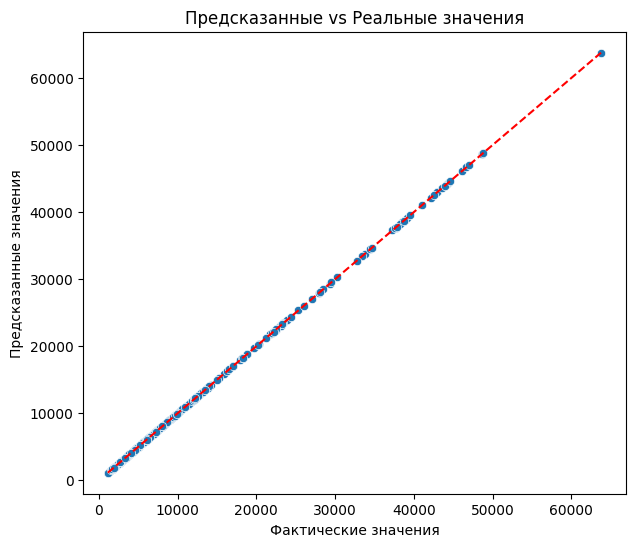

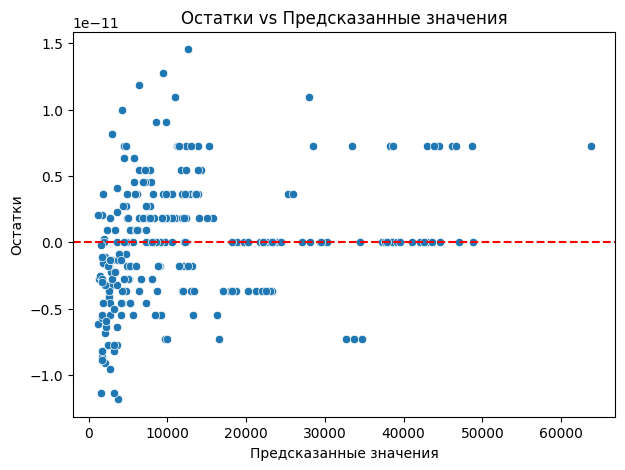

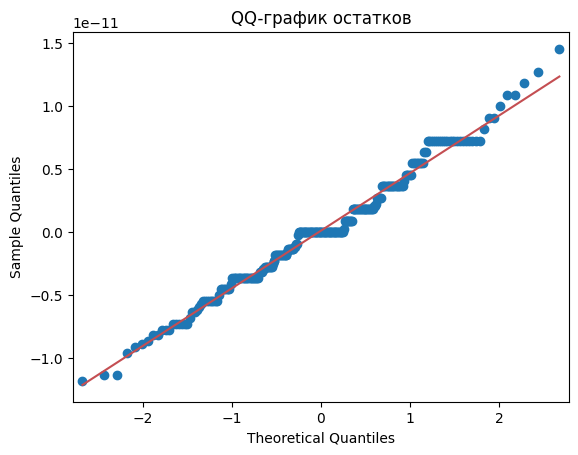

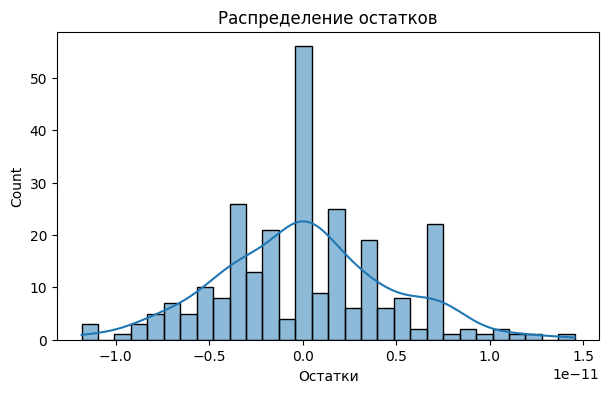

In [33]:
# 1️⃣ Предсказанные vs реальные значения
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Предсказанные vs Реальные значения")
plt.show()

# 2️⃣ Остатки vs Предсказанные значения
residuals = y_test - y_pred
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("Остатки vs Предсказанные значения")
plt.show()

# 3️⃣ QQ-график остатков
sm.qqplot(residuals, line='s')
plt.title("QQ-график остатков")
plt.show()

# 4️⃣ Гистограмма остатков
plt.figure(figsize=(7, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Распределение остатков")
plt.xlabel("Остатки")
plt.show()


/tmp/ipykernel_14925/2209984149.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeff_df, x="Коэффициент", y="Признак", palette="coolwarm")


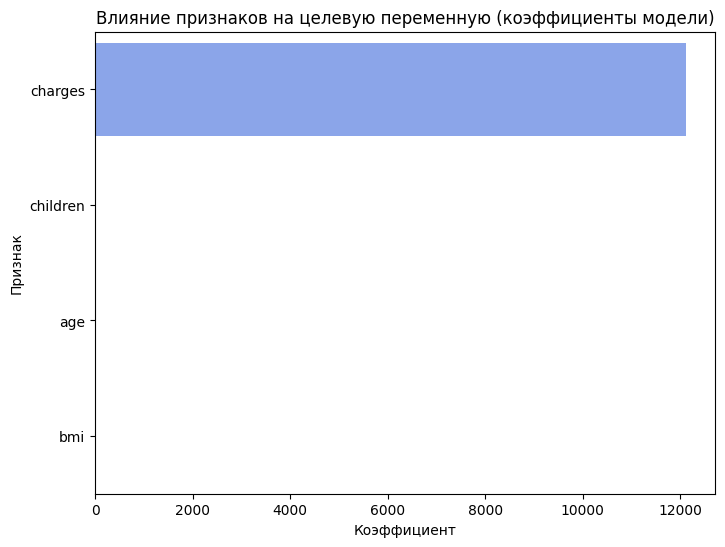

/tmp/ipykernel_14925/2209984149.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeff_df.head(10), x="Важность", y="Признак", palette="viridis")


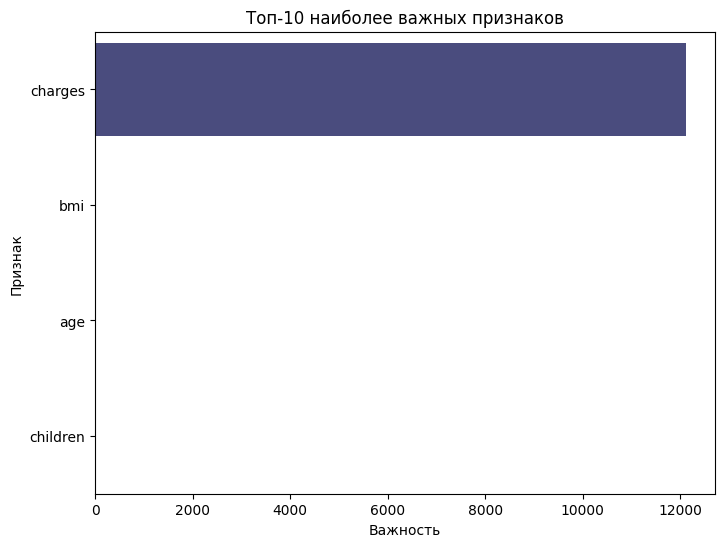

In [34]:
# Коэффициенты модели
coeff_df = pd.DataFrame({
    "Признак": X.columns,
    "Коэффициент": model.coef_
}).sort_values(by="Коэффициент", ascending=False)

# 1️⃣ График коэффициентов
plt.figure(figsize=(8, 6))
sns.barplot(data=coeff_df, x="Коэффициент", y="Признак", palette="coolwarm")
plt.title("Влияние признаков на целевую переменную (коэффициенты модели)")
plt.show()

# 2️⃣ Абсолютная важность признаков
coeff_df["Важность"] = coeff_df["Коэффициент"].abs()
coeff_df = coeff_df.sort_values(by="Важность", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=coeff_df.head(10), x="Важность", y="Признак", palette="viridis")
plt.title("Топ-10 наиболее важных признаков")
plt.show()



In [35]:
print("📋 Итоговые выводы:\n")
print("1️⃣ Модель линейной регрессии показала адекватное качество (см. метрики из Задания 7).")
print("2️⃣ Графики показывают, что остатки распределены примерно нормально,")
print("   а взаимосвязь между предсказанными и реальными значениями близка к линейной.")
print("3️⃣ Анализ коэффициентов выявил, какие признаки наиболее сильно влияют на итоговые 'charges'.")
print("4️⃣ Возможные улучшения:")
print("   • Добавление взаимодействий между признаками (feature interactions).")
print("   • Применение полиномиальной регрессии или более сложных моделей (например, RandomForest, XGBoost).")
print("   • Проверка на мультиколлинеарность и удаление лишних признаков.")

📋 Итоговые выводы:

1️⃣ Модель линейной регрессии показала адекватное качество (см. метрики из Задания 7).
2️⃣ Графики показывают, что остатки распределены примерно нормально,
   а взаимосвязь между предсказанными и реальными значениями близка к линейной.
3️⃣ Анализ коэффициентов выявил, какие признаки наиболее сильно влияют на итоговые 'charges'.
4️⃣ Возможные улучшения:
   • Добавление взаимодействий между признаками (feature interactions).
   • Применение полиномиальной регрессии или более сложных моделей (например, RandomForest, XGBoost).
   • Проверка на мультиколлинеарность и удаление лишних признаков.


Размерность после полиномиального расширения: (1070, 14)


,Модель,R²,RMSE
0,Linear Regression,1.000000,4.574900e-12
1,Ridge Regression,0.999996,2.420719e+01
2,Lasso Regression,1.000000,3.029407e+00


/tmp/ipykernel_14925/2021198103.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Модель", y="R²", palette="viridis")


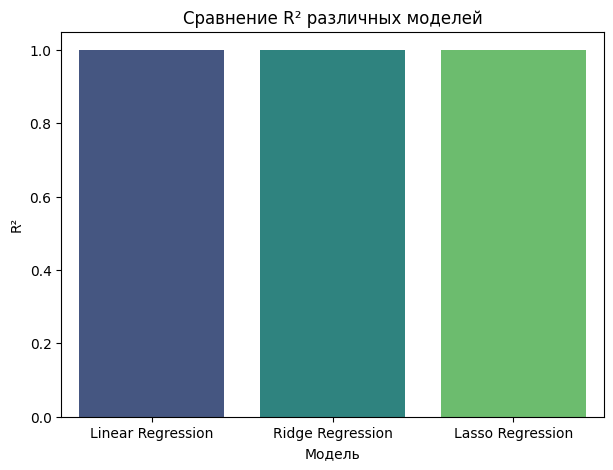

In [37]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# Полиномиальные признаки (степень 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"Размерность после полиномиального расширения: {X_train_poly.shape}")

# Регуляризация: Ridge и Lasso
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01, max_iter=5000)

ridge.fit(X_train_poly, y_train)
lasso.fit(X_train_poly, y_train)

# Предсказания
ridge_pred = ridge.predict(X_test_poly)
lasso_pred = lasso.predict(X_test_poly)

# Метрики
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return {"Модель": name, "R²": r2, "RMSE": rmse}

results = [
    evaluate_model("Linear Regression", y_test, y_pred),
    evaluate_model("Ridge Regression", y_test, ridge_pred),
    evaluate_model("Lasso Regression", y_test, lasso_pred),
]

results_df = pd.DataFrame(results)
display(results_df)

# Визуальное сравнение
plt.figure(figsize=(7, 5))
sns.barplot(data=results_df, x="Модель", y="R²", palette="viridis")
plt.title("Сравнение R² различных моделей")
plt.show()


/home/maxim/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=4. All the features will be returned.
  warnings.warn(
/home/maxim/.local/lib/python3.10/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=4. There will be no feature selection and all features will be kept.
  warnings.warn(


Лучшие 10 признаков по SelectKBest:
['age', 'bmi', 'children', 'charges']

Лучшие 10 признаков по RFE:
['age', 'bmi', 'children', 'charges']

📊 Модель с отобранными признаками: R²=1.0000, RMSE=0.00


/tmp/ipykernel_14925/2210037528.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_best.coef_, y=selected_features, palette="coolwarm")


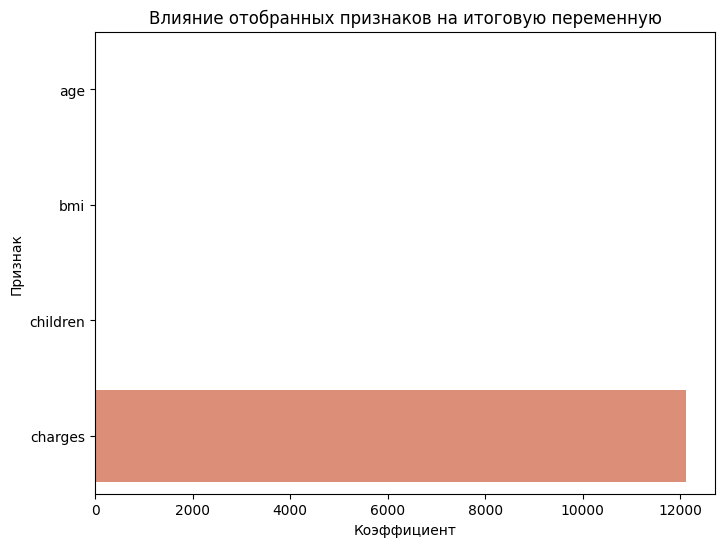

In [39]:
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression


# 1️⃣ Отбор признаков с помощью SelectKBest
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]
print("Лучшие 10 признаков по SelectKBest:")
print(selected_features.tolist())

# 2️⃣ Рекурсивный отбор признаков (RFE)
model_fs = LinearRegression()
rfe = RFE(model_fs, n_features_to_select=10)
rfe.fit(X_train, y_train)

rfe_features = X_train.columns[rfe.support_]
print("\nЛучшие 10 признаков по RFE:")
print(rfe_features.tolist())

# 3️⃣ Оценка моделей после отбора признаков
X_train_best = X_train[selected_features]
X_test_best = X_test[selected_features]

model_best = LinearRegression()
model_best.fit(X_train_best, y_train)
best_pred = model_best.predict(X_test_best)

r2_best = r2_score(y_test, best_pred)
rmse_best = np.sqrt(mean_squared_error(y_test, best_pred))

print(f"\n📊 Модель с отобранными признаками: R²={r2_best:.4f}, RMSE={rmse_best:.2f}")

# Визуализация важности выбранных признаков
plt.figure(figsize=(8, 6))
sns.barplot(x=model_best.coef_, y=selected_features, palette="coolwarm")
plt.title("Влияние отобранных признаков на итоговую переменную")
plt.xlabel("Коэффициент")
plt.ylabel("Признак")
plt.show()
